In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/jotech/Milestone Repo/milestone-project-5/data/clean_stock.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Close
0,2020-07-02,3130.010010
1,2020-07-06,3179.719971
2,2020-07-07,3145.320068
3,2020-07-08,3169.939941
4,2020-07-09,3152.050049


Visualize Price Data

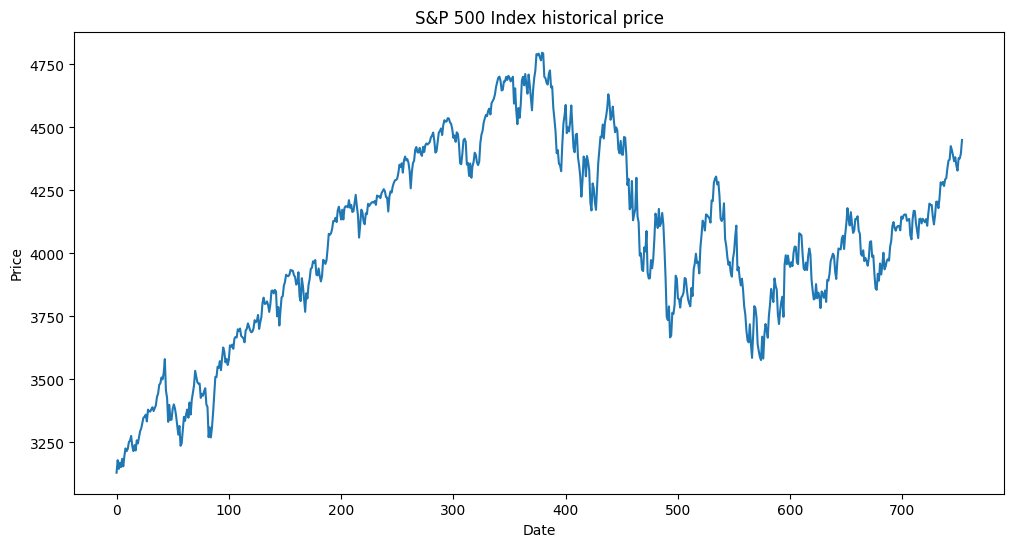

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title('S&P 500 Index historical price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Calculate Daily Change

In [4]:
df['Daily Return'] = df['Close'].pct_change()

Calculate Moving Averages for 50 and 200 days

In [5]:
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

Calculate Volatility

In [6]:
df['Volatility'] = df['Daily Return'].rolling(window=20).std()

Calculate Relative Strength Index

In [7]:
delta = df['Close'].diff()
gain = delta.mask(delta < 0, 0)
loss = -delta.mask(delta > 0, 0)
average_gain = gain.rolling(window=14).mean()
average_loss = loss.rolling(window=14).mean()
rs = average_gain / average_loss
df['RSI'] = 100 - (100 / (1 + rs))

Summary Analysis

In [8]:
summary_stats = df.describe()
print(summary_stats)

                                Date        Close  Daily Return        MA_50  \
count                            754   754.000000    753.000000   705.000000   
mean   2021-12-30 06:06:41.061008128  4046.740706      0.000534  4065.620706   
min              2020-07-02 00:00:00  3130.010010     -0.043237  3321.562808   
25%              2021-04-02 00:00:00  3819.052551     -0.006109  3877.251821   
50%              2021-12-29 12:00:00  4079.520020      0.000703  4033.125605   
75%              2022-09-28 18:00:00  4352.557373      0.007652  4366.931182   
max              2023-06-30 00:00:00  4796.560059      0.055434  4681.011611   
std                              NaN   380.162417      0.011515   340.861671   

            MA_200  Volatility         RSI  
count   555.000000  734.000000  740.000000  
mean   4143.011349    0.010918   55.187738  
min    3610.203705    0.004129   12.399610  
25%    3960.824211    0.007434   43.107115  
50%    4113.272457    0.010494   56.953244  
75%    43

Correlation analysis

In [9]:
df.corr()

,Date,Close,Daily Return,MA_50,MA_200,Volatility,RSI
Date,1.000000,0.369946,-0.029474,0.282280,0.021983,0.286378,-0.177797
Close,0.369946,1.000000,0.027920,0.898614,0.163657,-0.302662,0.087136
Daily Return,-0.029474,0.027920,1.000000,-0.061980,-0.061522,-0.015418,0.228350
MA_50,0.282280,0.898614,-0.061980,1.000000,0.488611,-0.140398,-0.137357
MA_200,0.021983,0.163657,-0.061522,0.488611,1.000000,0.554054,-0.298397
Volatility,0.286378,-0.302662,-0.015418,-0.140398,0.554054,1.000000,-0.371454
RSI,-0.177797,0.087136,0.228350,-0.137357,-0.298397,-0.371454,1.000000


In [10]:
corr_matrix = df.corr()['Close'].sort_values()
corr_matrix

Volatility     -0.302662
Daily Return    0.027920
RSI             0.087136
MA_200          0.163657
Date            0.369946
MA_50           0.898614
Close           1.000000
Name: Close, dtype: float64

In [11]:
df.to_csv('/Users/jotech/Milestone Repo/milestone-project-5/data/clean_engineered_stock.csv', index=None)